### experiments with `networkx`

_Alex Malz (CMU)_

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

nodes can be objects (coordinates, images, etc.), and edges can be associated with objects

{200: {'object': {'overlap': 40}}}


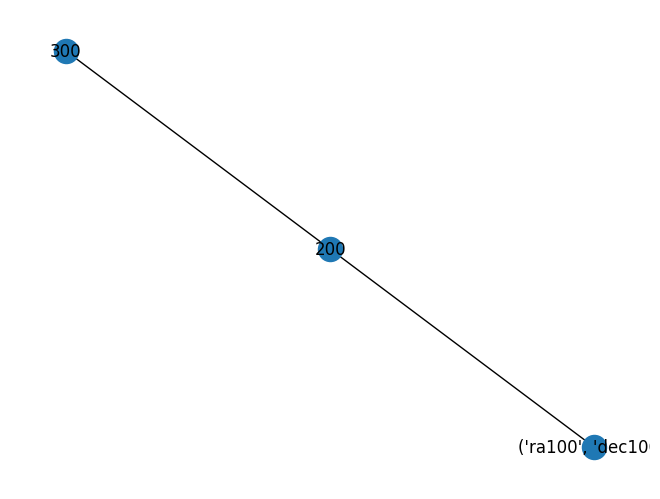

In [38]:
G = nx.Graph()
G.add_node(('ra100','dec100'))
G.add_nodes_from([200, 300])
G.add_edge(('ra100','dec100'), 200, object={'overlap': 40})

e = (200, 300)

G.add_edge(*e)  # unpack edge tuple*
print(G[('ra100','dec100')])
nx.draw(G, with_labels=True)

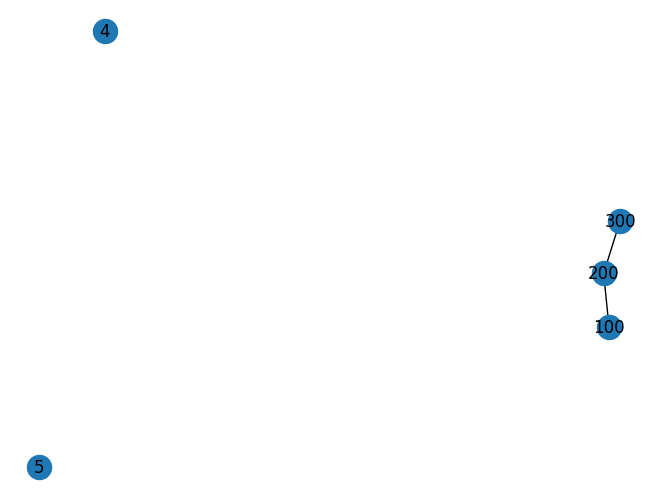

In [24]:
G.add_nodes_from([

    (4, {"color": "red"}),

    (5, {"color": "green"}),

])
G.add_edge(('ra100','dec100'), 200, object={'overlap': 40})
nx.draw(G, with_labels=True)

we can combine graphs representing postage stamps to make one for a whole catalog

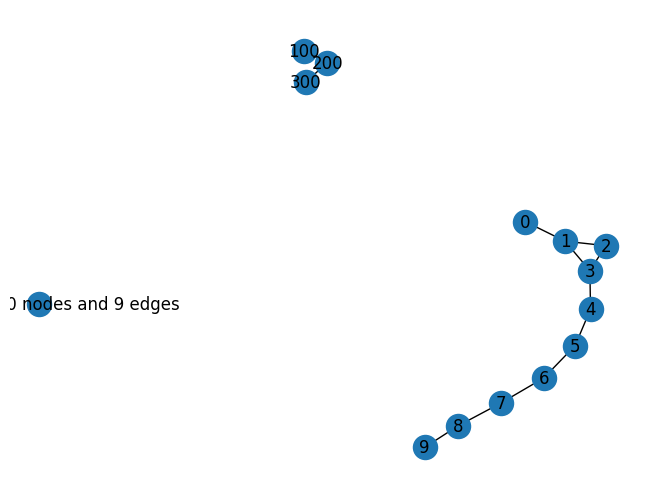

In [25]:
H = nx.path_graph(10)

G.add_nodes_from(H)
G.add_node(H)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)
nx.draw(G, with_labels=True)

we really want directed graphs, which seem to work similarly

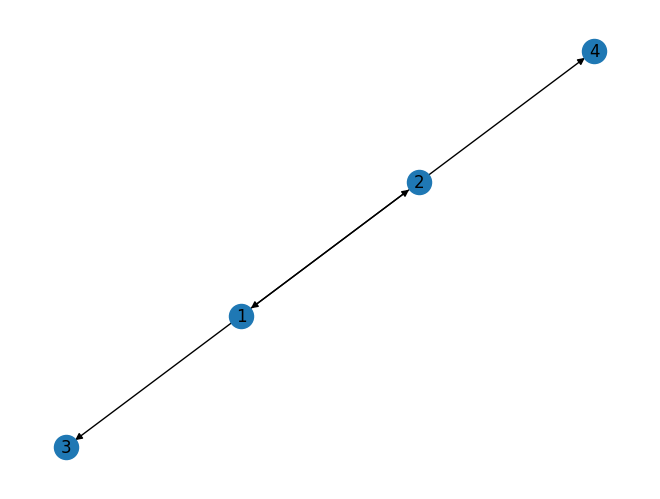

In [27]:
DG = nx.DiGraph()

DG.add_edge(2, 1)   # adds the nodes in order 2, 1

DG.add_edge(1, 3)

DG.add_edge(2, 4)

DG.add_edge(1, 2)

assert list(DG.successors(2)) == [1, 4]

assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]
nx.draw(DG, with_labels=True)

the real question is whether we benefit from bipartite

In [2]:
from networkx.algorithms import bipartite

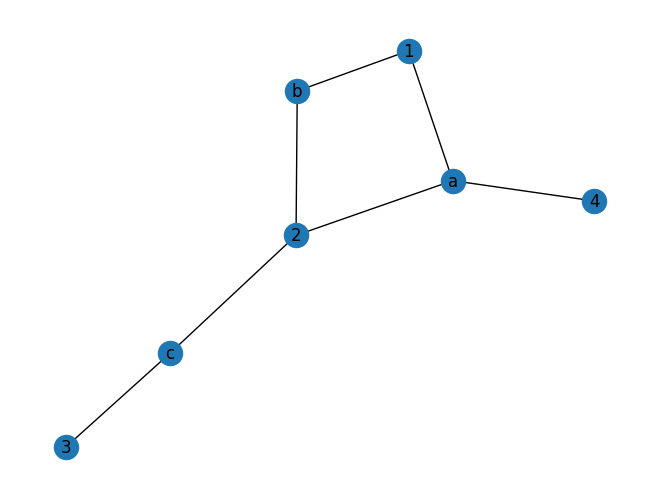

In [43]:
B = nx.Graph()

# Add nodes with the node attribute "bipartite"

B.add_nodes_from([1, 2, 3, 4], bipartite=0)

B.add_nodes_from(["a", "b", "c"], bipartite=1)

# Add edges only between nodes of opposite node sets

B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (2, "a"), (3, "c"), (4, "a")])
nx.draw(B, with_labels=True)